<a href="https://colab.research.google.com/github/FarahYusri12/Warfarin_ML/blob/main/warfarin_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df=pd.read_csv('Warfarin_gen_clinic.csv')
print(df.head())
print("\n" + "="*50 + "\n")
df.info()

            ID Age (years)  Gender  Weight (kg)  Height (cm)  Dose (mg)  \
0  PA135312261     60 - 69    Male        115.7       193.04       49.0   
1  PA135312262     50 - 59  Female        144.2       176.53       42.0   
2  PA135312263     40 - 49  Female         77.1       162.56       53.0   
3  PA135312264     60 - 69    Male         90.7       182.24       28.0   
4  PA135312265     50 - 59    Male         72.6       167.64       42.0   

  CYP2C9 VKORC1 (rs9923231; C/T)  
0  *1/*1                     A/G  
1  *1/*1                     A/A  
2  *1/*1                     G/G  
3  *1/*1                     A/G  
4  *1/*3                     A/G  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5700 non-null   object 
 1   Age (years)              5658 non-null   object 
 2   Gender    

In [2]:
print(df['CYP2C9'].unique())
print("\n" + "="*50 + "\n")
print(df['VKORC1 (rs9923231; C/T)'].unique())
print("\n" + "="*50 + "\n")
print(df['Age (years)'].unique())
print("\n" + "="*50 + "\n")
print(df['Gender'].unique())

['*1/*1' '*1/*3' '*1/*2' '*2/*2' '*2/*3' '*3/*3' nan '*1/*5' '*1/*13'
 '*1/*14' '*1/*11' '*1/*6']


['A/G' 'A/A' 'G/G' nan]


['60 - 69' '50 - 59' '40 - 49' '70 - 79' '30 - 39' '80 - 89' '90+'
 '20 - 29' '10 - 19' nan]


['Male' 'Female' nan]


In [3]:
# remove duplicate and missing value
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()
print("\n" + "="*50 + "\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3429 entries, 0 to 5410
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3429 non-null   object 
 1   Age (years)              3429 non-null   object 
 2   Gender                   3429 non-null   object 
 3   Weight (kg)              3429 non-null   float64
 4   Height (cm)              3429 non-null   float64
 5   Dose (mg)                3429 non-null   float64
 6   CYP2C9                   3429 non-null   object 
 7   VKORC1 (rs9923231; C/T)  3429 non-null   object 
dtypes: float64(3), object(5)
memory usage: 241.1+ KB




,ID,Age (years),Gender,Weight (kg),Height (cm),Dose (mg),CYP2C9,VKORC1 (rs9923231; C/T)
0,PA135312261,60 - 69,Male,115.7,193.04,49.0,*1/*1,A/G
1,PA135312262,50 - 59,Female,144.2,176.53,42.0,*1/*1,A/A
2,PA135312263,40 - 49,Female,77.1,162.56,53.0,*1/*1,G/G
3,PA135312264,60 - 69,Male,90.7,182.24,28.0,*1/*1,A/G
4,PA135312265,50 - 59,Male,72.6,167.64,42.0,*1/*3,A/G


In [4]:
# change age to midpoint

def convert_age(age_str):
    age_str = str(age_str).strip()  # remove space

    if "-" in age_str:  # for "60-69"
        low, high = age_str.split("-")
        return (int(low) + int(high)) / 2

    elif "+" in age_str:  # for "90+"
        base = int(age_str.replace("+", ""))
        return base  # atau (base + 100)/2 kalau nak anggar

df["Age"] = df["Age (years)"].apply(convert_age)
df.head()

,ID,Age (years),Gender,Weight (kg),Height (cm),Dose (mg),CYP2C9,VKORC1 (rs9923231; C/T),Age
0,PA135312261,60 - 69,Male,115.7,193.04,49.0,*1/*1,A/G,64.5
1,PA135312262,50 - 59,Female,144.2,176.53,42.0,*1/*1,A/A,54.5
2,PA135312263,40 - 49,Female,77.1,162.56,53.0,*1/*1,G/G,44.5
3,PA135312264,60 - 69,Male,90.7,182.24,28.0,*1/*1,A/G,64.5
4,PA135312265,50 - 59,Male,72.6,167.64,42.0,*1/*3,A/G,54.5


In [5]:
# encode for gender
df["Gender_code"] = df["Gender"].map({"Male": 1, "Female": 0})

# encode for CYP2C9
cyp_map= {"*1/*1":0, "*1/*2":1, "*1/*3":1, "*2/*3":2, "*3/*3":2}
df['CYP2C9_code']= df['CYP2C9']. map(cyp_map)

# encode for VKORC1
vkor_map= {"G/G":0, "A/G":1, "A/A":2}
df['VKORC1_code']=df['VKORC1 (rs9923231; C/T)'].map(vkor_map)

df.head()

,ID,Age (years),Gender,Weight (kg),Height (cm),Dose (mg),CYP2C9,VKORC1 (rs9923231; C/T),Age,Gender_code,CYP2C9_code,VKORC1_code
0,PA135312261,60 - 69,Male,115.7,193.04,49.0,*1/*1,A/G,64.5,1,0.0,1
1,PA135312262,50 - 59,Female,144.2,176.53,42.0,*1/*1,A/A,54.5,0,0.0,2
2,PA135312263,40 - 49,Female,77.1,162.56,53.0,*1/*1,G/G,44.5,0,0.0,0
3,PA135312264,60 - 69,Male,90.7,182.24,28.0,*1/*1,A/G,64.5,1,0.0,1
4,PA135312265,50 - 59,Male,72.6,167.64,42.0,*1/*3,A/G,54.5,1,1.0,1


In [6]:
# remove missing value
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 5410
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3382 non-null   object 
 1   Age (years)              3382 non-null   object 
 2   Gender                   3382 non-null   object 
 3   Weight (kg)              3382 non-null   float64
 4   Height (cm)              3382 non-null   float64
 5   Dose (mg)                3382 non-null   float64
 6   CYP2C9                   3382 non-null   object 
 7   VKORC1 (rs9923231; C/T)  3382 non-null   object 
 8   Age                      3382 non-null   float64
 9   Gender_code              3382 non-null   int64  
 10  CYP2C9_code              3382 non-null   float64
 11  VKORC1_code              3382 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 343.5+ KB


In [7]:
# Features and Target
# since we want to create machine learning model to study the relationship between factors(weight, height, gender, gene) toward dose
# so we put those factors in X and dose in y
x=df[["Age", "Gender_code", "CYP2C9_code", "VKORC1_code", "Weight (kg)","Height (cm)"]]
y=df['Dose (mg)']


In [8]:
# Train-test split
# pecahkan dataset jadi 2 bahagian, train set(data untuk ajar model) and test set(data untuk uji model lepas training)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [9]:
# train model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Evaluate model

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

# Evaluate model dalam machine learning adalah untuk tengok sejauh mana ramalan model itu tepat (berapa beza antara ramalan dgn nilai sebenar).
# MAE(Mean absolute error)- purata beza mutlak antara nilai sebenar dan nilai ramalan
# RMSE (Root mean squared error)- senang banding dgn unit asal (mg)
# R² (Coefficient of determination)- unkur berapa banyak variasi dose boleh dijelaskan dalam model (1.0= model fit, 0.0=model tak berguna)


Model Performance:
MAE  : 8.70
RMSE : 14.46
R²   : 0.40


In [11]:
# Feature important

importance = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nFeature Importance (Linear Coefficients):")
print(importance)

# FEATURE IMPORTANT adalah proses untuk melihat faktor mana yang paling kuat mempengaruhi dos


Feature Importance (Linear Coefficients):
       Feature  Coefficient
3  VKORC1_code    -9.334666
2  CYP2C9_code    -7.401497
1  Gender_code    -2.919801
0          Age    -0.266870
4  Weight (kg)     0.178843
5  Height (cm)     0.168944


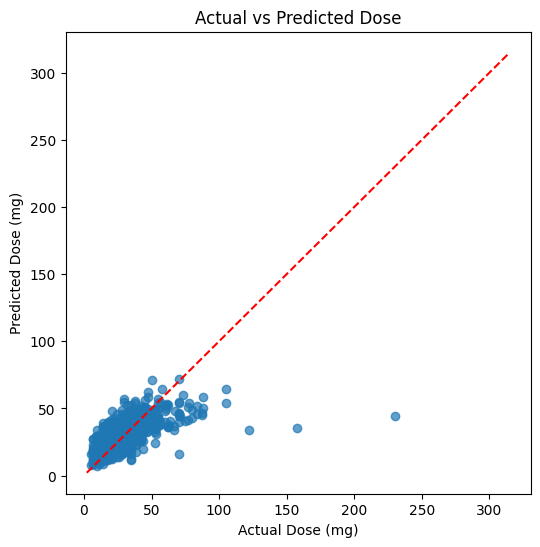

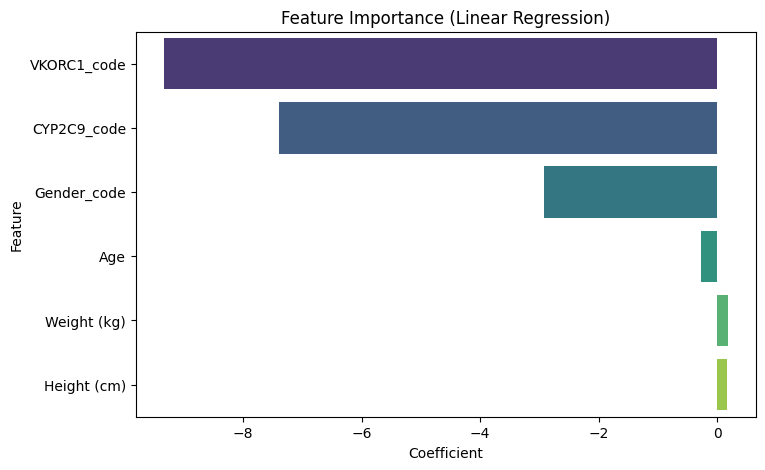

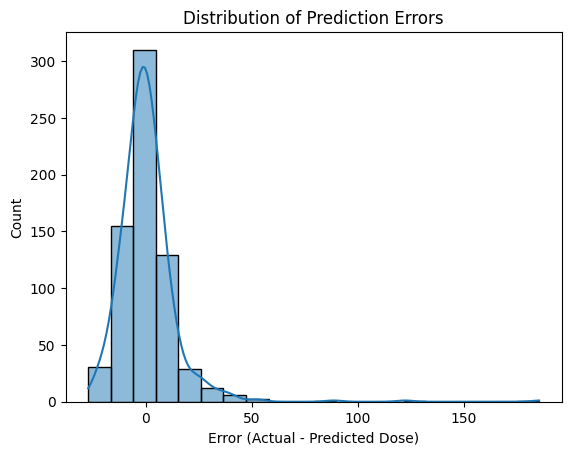

In [12]:
# Visualization

# Scatter plot: actual vs predicted dose
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Dose (mg)")
plt.ylabel("Predicted Dose (mg)")
plt.title("Actual vs Predicted Dose")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.show()

print("\n" + "="*100 + "\n")

# Feature important bar plot
plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=importance, hue="Feature", palette="viridis", legend=False)
plt.title("Feature Importance (Linear Regression)")
plt.show()

print("\n" + "="*100 + "\n")

# Distribution plot error(sejauh mana prediction lari)
errors = y_test - y_pred

sns.histplot(errors, bins=20, kde=True)
plt.xlabel("Error (Actual - Predicted Dose)")
plt.title("Distribution of Prediction Errors")
plt.show()